In [2]:
import pandas as pd
from pymilvus import MilvusClient
import tiktoken
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from tqdm import tqdm
from pymilvus import MilvusClient, DataType, Function, FunctionType

In [3]:
client = MilvusClient("milvus_demo.db")

In [20]:
df = pd.read_csv(
    "/home/rahul/github_projects/kh_analytics_interview/data/processed/amazon.csv"
)

In [4]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
df["text_data"] = (
    "## Product Name: "
    + df["product_name"]
    + "\n ## Product Category: "
    + df["category"]
    + "\n ## Product Details: "
    + df["about_product"]
)

In [6]:
print(df["text_data"][0])

## Product Name: Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)
 ## Product Category: Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables
 ## Product Details: High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper c

In [7]:
encoder = tiktoken.encoding_for_model("gpt2")

In [ ]:
df["num_tokens"] = df["text_data"].apply(lambda x: len(encoder.encode(x)))

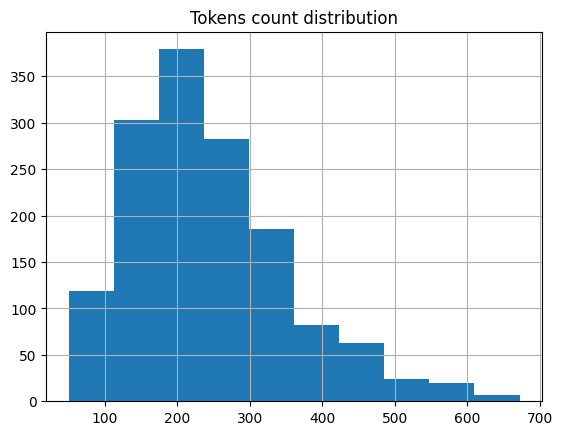

In [9]:
df["num_tokens"].hist()
plt.title("Tokens count distribution")
plt.show()

In [10]:
df.shape

(1465, 18)

In [11]:
model = SentenceTransformer("Snowflake/snowflake-arctic-embed-s")

In [ ]:
texts = df["text_data"].tolist()

In [15]:
## batch embedding
batch_size = 64
embeddings = []
for i in tqdm(range(0, len(texts), batch_size)):
    batch_texts = texts[i : i + batch_size]
    batch_embeddings = model.encode(batch_texts)
    embeddings.extend(batch_embeddings)

100%|██████████| 23/23 [02:43<00:00,  7.12s/it]


In [30]:
schema = client.create_schema(auto_id=True)

schema.add_field(
    field_name="id",
    datatype=DataType.INT64,
    is_primary=True,
    description="row id",
)
schema.add_field(
    field_name="text",
    datatype=DataType.VARCHAR,
    max_length=10000,
    enable_analyzer=True,
    description="raw text of product description",
)
schema.add_field(
    field_name="dense_vector",
    datatype=DataType.FLOAT_VECTOR,
    dim=384,
    description="text dense embedding",
)
schema.add_field(
    field_name="sparse_vector",
    datatype=DataType.SPARSE_FLOAT_VECTOR,
    description="text sparse embedding auto-generated by the built-in BM25 function",
)

bm25_function = Function(
    name="text_bm25_emb",
    input_field_names=["text"],
    output_field_names=["sparse_vector"],
    function_type=FunctionType.BM25,
)
schema.add_function(bm25_function)

{'auto_id': True, 'description': '', 'fields': [{'name': 'id', 'description': 'row id', 'type': <DataType.INT64: 5>, 'is_primary': True, 'auto_id': False}, {'name': 'text', 'description': 'raw text of product description', 'type': <DataType.VARCHAR: 21>, 'params': {'max_length': 10000, 'enable_analyzer': True}}, {'name': 'dense_vector', 'description': 'text dense embedding', 'type': <DataType.FLOAT_VECTOR: 101>, 'params': {'dim': 384}}, {'name': 'sparse_vector', 'description': 'text sparse embedding auto-generated by the built-in BM25 function', 'type': <DataType.SPARSE_FLOAT_VECTOR: 104>, 'is_function_output': True}], 'enable_dynamic_field': False, 'functions': [{'name': 'text_bm25_emb', 'description': '', 'type': <FunctionType.BM25: 1>, 'input_field_names': ['text'], 'output_field_names': ['sparse_vector'], 'params': {}}]}

In [31]:
index_params = client.prepare_index_params()

index_params.add_index(
    field_name="dense_vector",
    index_name="dense_vector_index",
    index_type="AUTOINDEX",
    metric_type="IP",
)

index_params.add_index(
    field_name="sparse_vector",
    index_name="sparse_vector_index",
    index_type="SPARSE_INVERTED_INDEX",
    metric_type="BM25",
    params={"inverted_index_algo": "DAAT_MAXSCORE"},
)

In [32]:
client.drop_collection(collection_name="products_collection")

In [33]:
client.create_collection(
    collection_name="products_collection", schema=schema, index_params=index_params
)

In [ ]:
embed_df = df[["text_data"]]
embed_df["dense_vector"] = embeddings

embed_df.to_parquet(
    "/home/rahul/github_projects/kh_analytics_interview/data/processed/amazon_embeddings.parquet",
    index=False,
)

In [3]:
embed_df = pd.read_parquet(
    "/home/rahul/github_projects/kh_analytics_interview/data/processed/amazon_embeddings.parquet"
)

In [ ]:
data = []
for i, row in embed_df.iterrows():
    data.append({"text": row["text_data"], "dense_vector": row["dense_vector"]})

In [35]:
client.insert(
    collection_name="products_collection",
    data=data,
)

{'insert_count': 1465, 'ids': [462976132904648704, 462976132904648705, 462976132904648706, 462976132904648707, 462976132904648708, 462976132904648709, 462976132904648710, 462976132904648711, 462976132904648712, 462976132904648713, 462976132904648714, 462976132904648715, 462976132904648716, 462976132904648717, 462976132904648718, 462976132904648719, 462976132904648720, 462976132904648721, 462976132904648722, 462976132904648723, 462976132904648724, 462976132904648725, 462976132904648726, 462976132904648727, 462976132904648728, 462976132904648729, 462976132904648730, 462976132904648731, 462976132904648732, 462976132904648733, 462976132904648734, 462976132904648735, 462976132904648736, 462976132904648737, 462976132904648738, 462976132904648739, 462976132904648740, 462976132904648741, 462976132904648742, 462976132904648743, 462976132904648744, 462976132904648745, 462976132904648746, 462976132904648747, 462976132904648748, 462976132904648749, 462976132904648750, 462976132904648751, 462976132

In [36]:
client.get_collection_stats(collection_name="products_collection")

{'row_count': 1465}